# CS-5824 / Advanced Machine Learning
# Assignment 1 Section B [ 40 Points ]

In this assignment, **you need to complete three sections** which are based on:

1. Logistic regression
2. MLE
3. Evaluation

## Submission guideline

1. Click the Save button at the top of the Jupyter Notebook.
2. Please make sure to have entered your Virginia Tech PID below.
3. Select Edit -> Clear All Output. This will clear all the outputs from all cells (but will keep the content of ll cells).
4. Select Runtime -> Restart and Run All. This will run all the cells in order.
5. Once you've rerun everything, select File -> Print -> Save as PDF
6. Look at the PDF file and make sure all your solutions are there, displayed correctly. 
7. Upload **both** the PDF file and this notebook.
8. Please **DO NOT** upload any data.

### Please Write Your VT PID Here: 906525375

# Section 0. Environment Set Up

In [ ]:
!pip install scipy==1.1.0 Pillow==4.3.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Mount your google drive in google colab

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


Append the directory to your python path using sys

In [ ]:
import sys
prefix = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where you uploaded your homework
customized_path_to_your_homework = 'CS 5824 ML/HW1/'
sys_path = prefix + customized_path_to_your_homework
sys.path.append(sys_path)

Run some setup code for this notebook.

In [ ]:
from __future__ import print_function
import random
import numpy as np
import matplotlib.pyplot as plt

# This is a bit of magic to make matplotlib figures appear inline in the notebook rather than in a new window.
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

# Some more magic so that the notebook will reload external python modules;
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectFromModel
from sklearn import preprocessing

## Section 1. Logistic Regression [ 18 points ]

In this problem, we’ll apply logistic regression to a data set of spam email. 
This data consists of 4601 email messages, from which 57 features have been extracted. These are as follows:
- 48 features in [0, 100], giving the percentage of words in a given message which match a given
word on a list containing, e.g., “business”, “free”, etc.
- 6 features in [0, 100], giving the percentage of characters in the email that match characters on a
list containing, e.g., “$”, “#”, etc.
- Feature 55: The average length of an uninterrupted sequence of capital letters.
- Feature 56: The length of the longest uninterrupted sequence of capital letters.
- Feature 57: The sum of the lengths of uninterrupted sequences of capital letters.


There are files spam.train.dat and spam.test.dat (provided in the assignment files) in which
each row is an email. There are 3000 training and 1601 test examples. The final column in each file
indicates whether the email was spam.

The files can be loaded using the block of code below. You will answer the following questions using the data provided. 

In [ ]:
prefix = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where your data is
customized_path_to_your_homework = 'CS 5824 ML/HW1/'
train_path = prefix + customized_path_to_your_homework + 'data/spam.train.dat'
train_set = np.genfromtxt('/content/spam.train.dat')
train_set
test_path = prefix + customized_path_to_your_homework + '/content/spam.test.dat'
test_set = np.genfromtxt('/content/spam.test.dat')
test_set

array([[  0.  ,   0.  ,   0.  , ...,   5.  ,  17.  ,   0.  ],
       [  0.  ,   0.  ,   0.  , ...,  34.  , 127.  ,   0.  ],
       [  1.19,   0.  ,   0.  , ...,  11.  ,  68.  ,   0.  ],
       ...,
       [  0.49,   0.49,   0.49, ...,  47.  , 281.  ,   1.  ],
       [  0.  ,   0.95,   0.95, ...,  45.  , 464.  ,   1.  ],
       [  0.  ,   0.  ,   0.  , ...,   1.  ,   4.  ,   0.  ]])

### Question 1. [ 3 points ]

Build a Logistic Regression model to classify whether an email is spam or not using the *spam* data set. Report your training and test performance.

In [ ]:
#Build your model
X=train_set[:,:-1]
Y=train_set[:,-1]
xt=test_set[:,:-1]
yt=test_set[:,-1]
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)
xt = sc_X.transform(xt)
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X, Y)
y_predtr=logreg.predict(X)
y_pred = logreg.predict(xt)


In [ ]:
#Report training and test performance here
from sklearn.metrics import accuracy_score
print ("Accuracy of training: ", accuracy_score(Y, y_predtr))
print ("Accuracy of test: ", accuracy_score(yt, y_pred))

Accuracy of training:  0.9323333333333333
Accuracy of test:  0.9206745783885072


### Question 2. [ 3 points ]

Plot the learning curve for this model. What is the Bias/Variance trade-off for this model ?

([1.9572106556687763,
  2.072345240968013,
  2.2642282204924387,
  2.245041788267334,
  2.601946209136085,
  2.3026086366961573,
  2.302606796352866,
  2.403345846073058,
  2.404944123130757,
  2.3371459915845256],
 [3.8184925672457353,
  3.4517472838519305,
  3.149716761988688,
  3.14971776086118,
  3.106570258060005,
  3.0202757518939003,
  3.04184800498575,
  2.912405496582223,
  2.7398204797399837,
  2.73982097917623])

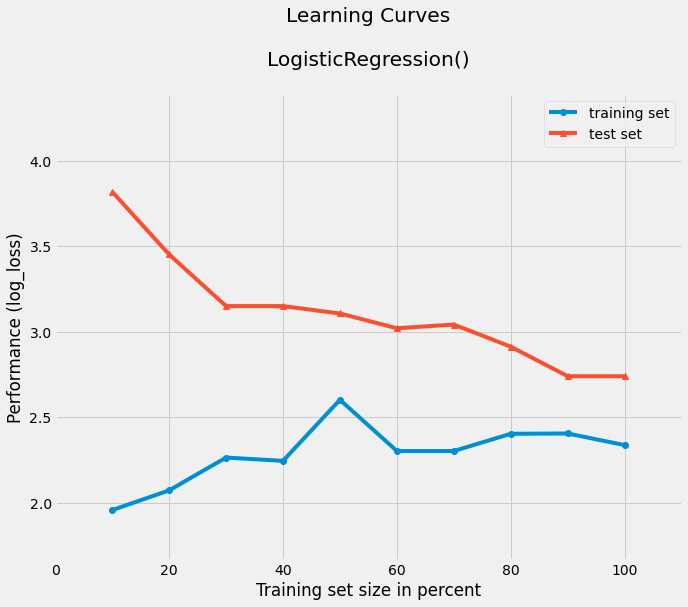

In [ ]:
from mlxtend.plotting import plot_learning_curves
import matplotlib.pyplot as plt
plot_learning_curves(X, Y, xt, yt, logreg, scoring = 'log_loss')

In [ ]:
'''
Initially the model's training set has a low bias but has a high variance as the error in training is almost 0 but for test it is high almost 3.8 resulting in overfitting. As the training set size increases, the test error
decreases and the training error increases. At almost 50 percentage the model has a high bias and still compartively higher error resulting in under fitting. But from 80 percentage the model' test error decreases
further as does the model's train error resulting in an optimal tradeoff between bias and variance resulting in an optimal model.
'''

"\nInitially the model's training set has a low bias but has a high variance as the error in training is almost 0 but for test it is high almost 3.8 resulting in overfitting. As the training set size increases, the test error\ndecreases and the training error increases. At almost 50 percentage the model has a high bias and still compartively higher error resulting in under fitting. But from 80 percentage the model' test error decreases\nfurther as does the model's train error resulting in an optimal tradeoff between bias and variance resulting in an optimal model.\n"

### Question 3. [ 3 points ]

Apply L2-regularized logistic regression. Use cross-validation to determine an appropriate regularization penalty. Report your procedure and the value you find. What training and test performance do you get with this value?

In [ ]:
#Apply L2-regularized logistic regression
from sklearn.model_selection import cross_val_score
lamb=0.1
l2=[]
c=0
for i in range(100):
  c=1/lamb
  c=round(c,2)
  l2.append(c)
  lamb=lamb+0.01


In [ ]:
l4=[0.001,0.01,0.1,1,10,100]

In [ ]:
'''
C is the inverse of the regularization strength(alpha or lambda) intially lambda is chosen as 0.1 then lambda is inversed converted to c and stored in l2. Each time lambda is increased by 0.01.
The list l2 containing the C values is passed to the model with l2 regualrization and the best value based on cross validation is chosen
'''

'\nC is the inverse of the regularization strength(alpha or lambda) intially lambda is chosen as 0.1 then lambda is inversed converted to c and stored in l2. Each time lambda is increased by 0.01.\nThe list l2 containing the C values is passed to the model with l2 regualrization and the best value based on cross validation is chosen\n'

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf = LogisticRegressionCV(penalty='l2',Cs=l2,cv=5, random_state=0,max_iter=3000).fit(X, Y)
l2ytt=clf.predict(X)
l2yt=clf.predict(xt)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy of training: ", accuracy_score(Y, l2ytt))
print ("Accuracy of test: ", accuracy_score(yt, l2yt))

Accuracy of training:  0.9333333333333333
Accuracy of test:  0.9194253591505309


### Question 4. [ 3 points ]

Apply L1-regularized logistic regression. Use cross-validation to determine an appropriate regularization penalty. Report your procedure and the value you find. What training and test performance do you get with this value?

In [ ]:
'''
C is the inverse of the regularization strength(alpha or lambda) intially lambda is chosen as 0.1 then lambda is inversed converted to c and stored in l2. Each time lambda is increased by 0.01.
The list l2 containing the C values is passed to the model with l1 regualrization and the best value based on cross validation is chosen
'''

'\nC is the inverse of the regularization strength(alpha or lambda) intially lambda is chosen as 0.1 then lambda is inversed converted to c and stored in l2. Each time lambda is increased by 0.01.\nThe list l2 containing the C values is passed to the model with l1 regualrization and the best value based on cross validation is chosen\n'

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf1 = LogisticRegressionCV(penalty='l1',Cs=[10],cv=5, random_state=0,max_iter=3000,solver='liblinear').fit(X, Y)
l1ytt=clf.predict(X)
l1yt=clf.predict(xt)

In [ ]:
from sklearn.linear_model import LogisticRegressionCV
clf1 = LogisticRegressionCV(penalty='l1',Cs=l2,cv=5, random_state=0,max_iter=3000,solver='liblinear').fit(X, Y)
l1ytt=clf.predict(X)
l1yt=clf.predict(xt)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy of training: ", accuracy_score(Y, l1ytt))
print ("Accuracy of test: ", accuracy_score(yt, l1yt))

Accuracy of training:  0.9333333333333333
Accuracy of test:  0.9194253591505309


### Question 5. [ 3 points ]

What are the advantages and disadvantages of the two models with repect to this problem? For example, have there been a lot of sparceness in the model, or what kind of features have been removed?

In [ ]:
# Advantages and disadvantages of the two models 


selector2 = SelectFromModel(estimator=LogisticRegressionCV(penalty='l1',Cs=[0.1],cv=5, random_state=0,max_iter=3000,solver='liblinear')).fit(X, Y)
print(selector2.get_support())
print(selector2.estimator_.coef_)


[ True  True  True  True  True  True  True  True  True  True False  True
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True False  True False  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True False  True  True  True  True False  True  True]
[[-3.63024943e-02 -8.97399054e-02  5.72743743e-02  1.17290718e-01
   3.44114578e-01  1.89826928e-01  7.66496853e-01  2.04839704e-01
   1.68921000e-01  4.16272608e-02  0.00000000e+00 -1.08321522e-02
   0.00000000e+00  0.00000000e+00  1.14596346e-01  6.05707266e-01
   2.51584094e-01  8.16870174e-02  1.35287660e-01  2.07687498e-01
   1.90272174e-01  1.91626027e-01  7.86388206e-01  3.33494095e-01
  -1.74793727e+00 -6.07138784e-01 -1.84541240e+00  6.92065824e-02
  -1.11057044e-01 -7.44490621e-02 -1.76199941e-03  0.00000000e+00
  -3.81935554e-01  0.00000000e+00 -6.62675783e-02  9.34495055e-02
  -2.01579703e-01 -5.08769385e-02 -1.05743086e-01 -1.94887

In [ ]:
#Lasso regression
'''
The lasso regression takes the magnitude of the coeffecients. The coefficients can be shrunk towards a mean of zero. As a result feature reduction is possible in lasso regression. The coefficients are laplacian distributed
We get sparsity is lasso and less important features are removed during the penalization, leading to automatic feature selection. Can be used when there are less number of significant parameters and others can be
made to zero.
'''

'\nThe lasso regression takes the magnitude of the coeffecients. The coefficients can be shrunk towards a mean of zero. As a result feature reduction is possible in lasso regression. The coefficients are laplacian distributed\nWe get sparsity is lasso and less important features are removed during the penalization, leading to automatic feature selection. Can be used when there are less number of significant parameters and others can be\nmade to zero.\n'

In [ ]:
selector1 = SelectFromModel(estimator= LogisticRegressionCV(penalty='l2',Cs=l2,cv=5, random_state=0,max_iter=3000)).fit(X, Y)
print(selector1.get_support())
print(selector1.estimator_.coef_)

[False False False  True False False  True False False False False False
 False False False  True False False False False False False  True False
  True  True  True False  True False False False  True  True  True False
 False False False False  True  True False  True  True  True False  True
 False False False False  True  True  True  True False]
[[-1.02005824e-01 -2.35924011e-01  6.09101524e-02  1.15070072e+00
   3.84296308e-01  2.91420933e-01  6.97543516e-01  2.11561433e-01
   2.57989268e-01  4.75344990e-02 -2.82454832e-02 -1.47290215e-02
  -6.60590475e-04  1.76857539e-02  2.68201840e-01  9.78678673e-01
   3.18159754e-01  3.84588159e-02  1.30829748e-01  3.09655726e-01
   1.86343504e-01  1.79694116e-01  8.69842684e-01  3.26547716e-01
  -3.01068909e+00 -1.61983248e+00 -4.96055626e+00  2.00624136e-01
  -1.71010482e+00 -2.42789608e-01 -1.83523415e-01  6.12998150e-01
  -6.86205750e-01 -1.43710712e+00 -1.26119094e+00  4.21316790e-01
  -2.04077982e-01 -1.73445194e-01 -4.03522201e-01 -4.32569

In [ ]:
#Ridge regression(l2)
'''
The ridge regression takes the coefficient of magnitude and squares them. As a result the coefficient can only be taken closer towards zero but not reduced to zero. As a result though the amount of certain coefficients
can be decreased they cannot be eliminated. In ridge the coefficients are normally distributed. When most of the features impact the model ridge is chosen.
'''

'\nThe ridge regression takes the coefficient of magnitude and squares them. As a result the coefficient can only be taken closer towards zero but not reduced to zero. As a result though the amount of certain coefficients\ncan be decreased they cannot be eliminated. In ridge the coefficients are normally distributed. When most of the features impact the model ridge is chosen.\n'

### Question 6. [3 points]

Transform the features with the basis function of your choice. Retrain the two models above and report the model performances. Why did you choose this basis function ?

In [ ]:
X=train_set[:,:-1]
Y=train_set[:,-1]
xt=test_set[:,:-1]
yt=test_set[:,-1]

In [ ]:
mean=np.mean(X,axis=0)
#meant=np.mean(xt,axis=0)
mean = np.expand_dims(mean, axis=0)
#Xte=np.expand_dims(meant, axis=0)
meanin=1/mean
#Xte=1/Xte
Xte1=meanin*np.exp(-(meanin*X))
Xtr1=meanin*np.exp(-(meanin*xt))



In [ ]:
l4=[0.001,0.01,0.1,1,10,100]

In [ ]:
clfb = LogisticRegressionCV(penalty='l1',Cs=l4,cv=5, random_state=0,max_iter=3000,solver='liblinear').fit(Xte1, Y)
l1ybt=clfb.predict(Xte1)
l1yb=clfb.predict(Xtr1)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy of training: ", accuracy_score(Y, l1ybt))
print ("Accuracy of test: ", accuracy_score(yt, l1yb))

Accuracy of training:  0.95
Accuracy of test:  0.9350405996252342


In [ ]:
clfb = LogisticRegressionCV(penalty='l2',Cs=l4,cv=5, random_state=0,max_iter=3000,solver='liblinear').fit(Xte1, Y)
l1ybt=clfb.predict(Xte1)
l1yb=clfb.predict(Xtr1)

In [ ]:
from sklearn.metrics import accuracy_score
print ("Accuracy of training: ", accuracy_score(Y, l1ybt))
print ("Accuracy of test: ", accuracy_score(yt, l1yb))

Accuracy of training:  0.9493333333333334
Accuracy of test:  0.9356652092442224


In [ ]:
#Reason for choosing basis functions
'''
Linear and logisitc regression assumes that the data is normally gaussian distributed. The basis function considered is an exponential function which is 1/mean*(exp(-(1/mean*xi)))where i belongs to the number of data
samples.The relationship betweeen the dependent and independent variables are considered to be linear. The data points are also considered to be follow multivariate normalitiy. As we are performing logistic regression
we assume that there is no or very little collinearity between two or more independent variables.  The values are also considered to be Homoscedascity, i.e. the error term remains a constant across all independent
variables.
'''


'\nLinear and logisitc regression assumes that the data is normally gaussian distributed. The basis function considered is an exponential function which is 1/mean*(exp(-(1/mean*xi)))where i belongs to the number of data\nsamples.The relationship betweeen the dependent and independent variables are considered to be linear. The data points are also considered to be follow multivariate normalitiy. As we are performing logistic regression\nwe assume that there is no or very little collinearity between two or more independent variables.  The values are also considered to be Homoscedascity, i.e. the error term remains a constant across all independent\nvariables.\n'

# Section 2. MLE [15 pts]

For the following problems, we will a collaborative filtering data set. These data
are originally from http://eigentaste.berkeley.edu/dataset/, however, they have been altered somewhat for this HW, so you should use the files directly shared from us. These problems will only examine the marginal distribution of the ratings themselves. Assuming that the data set is in your homework path on google drive, the ratings can be loaded into your collab session using the block of code in the next cell. This will give you a 1761439 × 3 matrix of doubles. Right now we only care about the ratings, which are the third column. You’ll be asked to produce figures. Include these figures in your notebook.

In [ ]:
prefix = '/content/gdrive/My Drive/'
# modify "customized_path_to_your_homework" here to where your data is
customized_path_to_your_homework = 'CS 5824 ML/HW1/'
data_path = prefix + customized_path_to_your_homework + 'data/jester_ratings.dat'
data = np.genfromtxt('/content/jester_ratings.dat')
data

array([[ 1.000000e+00,  5.000000e+00,  2.275770e-01],
       [ 1.000000e+00,  7.000000e+00, -9.279702e+00],
       [ 1.000000e+00,  8.000000e+00, -9.267760e+00],
       ...,
       [ 6.397800e+04,  1.240000e+02, -9.022733e+00],
       [ 6.397800e+04,  5.800000e+01, -8.644745e+00],
       [ 6.397800e+04,  4.400000e+01, -8.445059e+00]])

### Question 1. [ 5 points ]

Generate a set of normalized histograms (histograms which have an area of one) of the ratings and
qualitatively describe the empirical distributions that you see. Try several different bin sizes and explain your choices. Are the resulting density estimates uni- or multi-modal? Where do the peaks
appear to be? Do these answers change as you vary the number of bins?

In [ ]:
# Your answer here (code, histogram, response to questions)
def diagnostic_plots(df, variable,bi):
    #  to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    print(df.mean(axis = 0))
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    df[variable].hist(bins=bi)

    plt.subplot(1, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    

In [ ]:
import pandas as pd
import scipy.stats as stats
X=data[:,2]
df = pd.DataFrame(X[:-1], columns = ['X'])

X    1.618585
dtype: float64


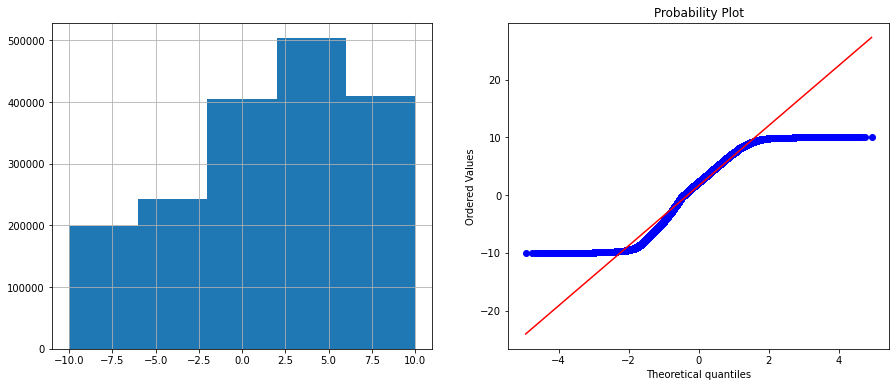

In [ ]:
diagnostic_plots(df, 'X',5)

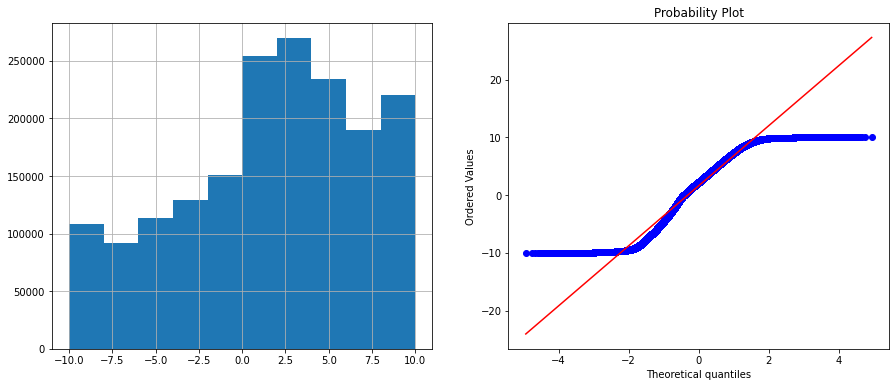

In [ ]:
diagnostic_plots(df, 'X',10)

X    1.618585
dtype: float64


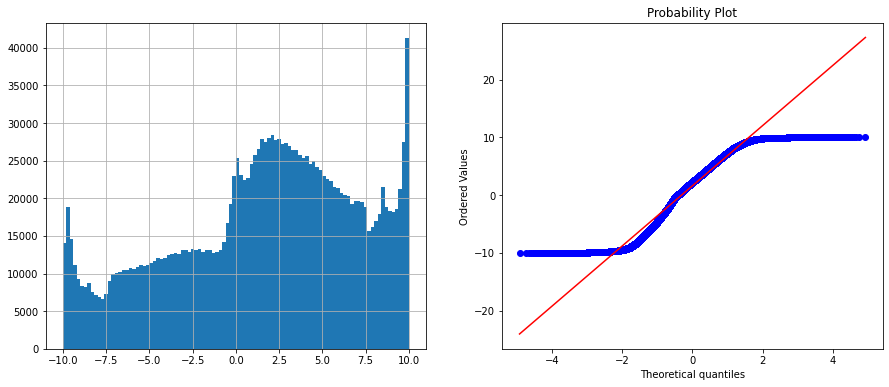

In [ ]:
diagnostic_plots(df, 'X',100)

In [ ]:
'''
By varying the bin size the graph changes from unimodal to multimodal. When the bin sizes are 5 the distribution has only onr peak. When the bin size is changed to 10 we are able to see two peaks. As we increase the bin size
the models shape also changes with the right edged peak increasing. With low bin values the graph drew parallel to a gaussian distributed function but as the bin size increased it did not represent a normal distribution.
'''

'\nBy varying the bin size the graph changes from unimodal to multimodal. When the bin sizes are 5 the distribution has only onr peak. When the bin size is changed to 10 we are able to see two peaks. As we increase the bin size\nthe models shape also changes with the right edged peak increasing. With low bin values the graph drew parallel to a gaussian distributed function but as the bin size increased it did not represent a normal distribution.\n'

### Question 2. [ 5 points ]

Perform a maximum-likelihood fit of a Gaussian distribution to the ratings and report the mean and
variance. Overlay the MLE Gaussian fit on top of the normalized histogram. Is it a good fit or a bad fit
and why?



In [ ]:
# Fit MLE model
import scipy
def diagnostic_plots1(df, variable,bin):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    #plt.figure(figsize=(15,6))
    #plt.subplot(1, 2, 1)
    #df[variable].hist(bins=10)

    #plt.subplot(1, 2, 2)
    #stats.probplot(df[variable], dist="norm", plot=plt)
    mean=np.mean(X)
    sig=0
    for i in range(len(X)):
      sig=(X[i]-mean)**2+sig
    sigma=sig/len(X)
    sigsq=np.sqrt(sigma)
    _, bins, _ = plt.hist(X, bin, density=1, alpha=0.5)
    best_fit_line = scipy.stats.norm.pdf(bins, mean, sigsq)
    plt.plot(bins, best_fit_line)
    
    scores = np.random.normal(loc=mean, scale=sigsq, size=500)
    _, bins, _ = plt.hist(scores, bin, density=1, alpha=0.5)
    
    
    print('sigma',sigma)
    print('mean',mean)
    plt.show()

    

In [ ]:
def diagnostic_plots2(df, variable,bin):
    # function to plot a histogram and a Q-Q plot
    # side by side, for a certain variable
    
    #plt.figure(figsize=(15,6))
    #plt.subplot(1, 2, 1)
    #df[variable].hist(bins=10)

    #plt.subplot(1, 2, 2)
    #stats.probplot(df[variable], dist="norm", plot=plt)
    mean=np.mean(X)
    sig=0
    for i in range(len(X)):
      sig=(X[i]-mean)**2+sig
    sigma=sig/len(X)
    sigsq=np.sqrt(sigma)
    _, bins, _ = plt.hist(X, bin, density=1, alpha=0.5)
    best_fit_line = scipy.stats.norm.pdf(bins, mean, sigsq)
    plt.plot(bins, best_fit_line)
    
    scores = np.random.normal(loc=mean, scale=sigsq, size=500)
    #_, bins, _ = plt.hist(scores, 10, density=1, alpha=0.5)
    
    
    print('sigma',sigma)
    print('mean',mean)
    plt.show()

sigma 28.11713429298038
mean 1.618578798261535


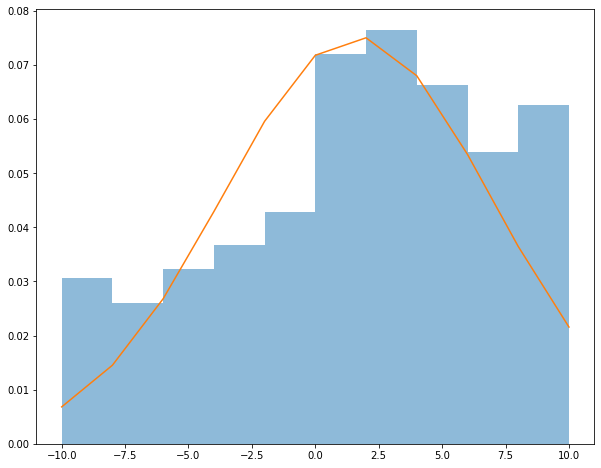

In [ ]:
# Report mean and variance
diagnostic_plots2(df, 'X',10)

sigma 28.11713429298038
mean 1.618578798261535


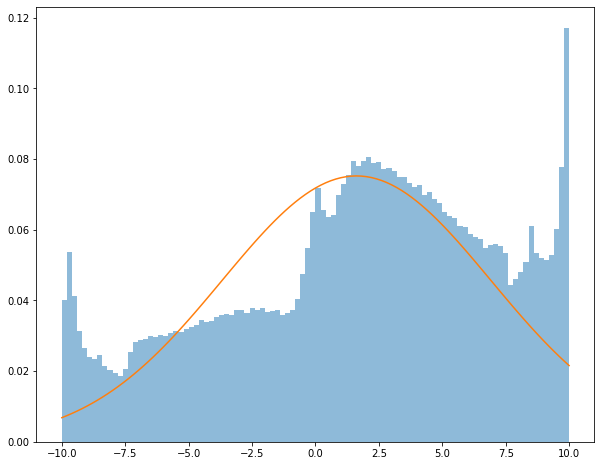

In [ ]:
diagnostic_plots2(df, 'X',100)

sigma 28.11713429298038
mean 1.618578798261535


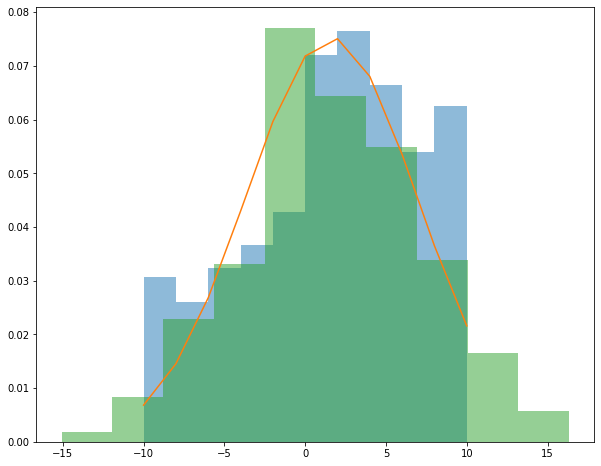

In [ ]:
# Overlay two histograms
diagnostic_plots1(df, 'X',10)

sigma 28.11713429298038
mean 1.618578798261535


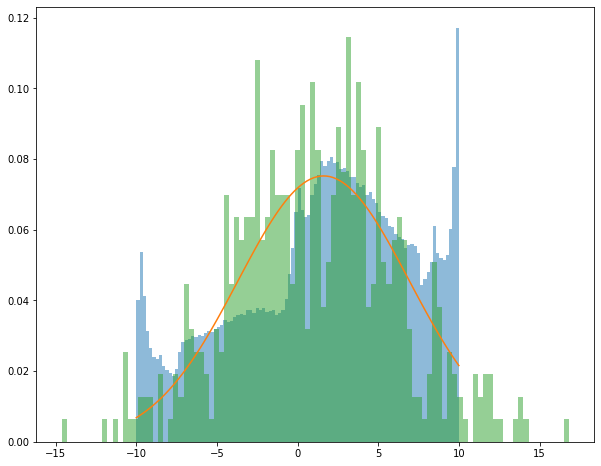

In [ ]:
diagnostic_plots1(df, 'X',100)

In [ ]:
# Explain model fit
'''
For smaller values of bin the gaussian fit seems like a good fit but as bins are increased it is evident that the gaussian function is bad fit as the result is a multimodal histogram but the Gaussian fit results
in unimodal histogram
'''

'\nFor smaller values of bin the gaussian fit seems like a good fit but as bins are increased it is evident that the gaussian function is bad fit as the result is a multimodal histogram but the Gaussian fit results\nin unimodal histogram\n'

### Question 3. [ 5 points ]

Randomly partition the data into ten disjoint sets (called folds) of approximately the same size. We will use these partitions to assess the generalization performance of these MLE fits. This is done by creating ten experiments where one fold is taken to be a “test” set and the remaining nine are together considered to be the “training” set. A model is fit on the training data and asked to make predictions of the test set. For a given model, this produces ten log probability numbers that reflect how well the model generalized to the unseen data. If the folds are of different size, the predictive log probabilities can be turned into “averages” by dividing the overall logprob by the number of test cases. Perform this procedure for your Gaussian histogram density estimators from Problem 1 and 2. That is, fit this model ten times on 9/10ths of the data and ask it to make predictions of the remaining 1/10th. To visualize the results, produce a boxplot of the average log probabilities.

In [ ]:
# Perform 10-fold cross validation
import math
import scipy
from sklearn.model_selection import KFold
negl=[]

kfold_cv = KFold(n_splits=10, random_state=42, shuffle=True)


In [ ]:
from scipy.stats import norm
for index, (train_index, val_index) in enumerate(kfold_cv.split(X)):
  mean=np.mean(X[train_index])

  #mean=mean/len(train_index)
  std=np.std(X[train_index])
  #std=np.sqrt(std)
  #std=std/len(train_index)
  #print(mean)
  #print(std)
  log_likelihood = norm.logpdf(X[val_index], mean, std)
  sum=np.sum(log_likelihood)
  sum=sum/len(log_likelihood)
  negl.append(sum)
  print(sum)

-3.0876263689623173
-3.0883579769828087
-3.0866550914251545
-3.0893548475421575
-3.088527360147229
-3.0854924725970525
-3.087609294635255
-3.088067363052625
-3.083854518157483
-3.0857446072161245


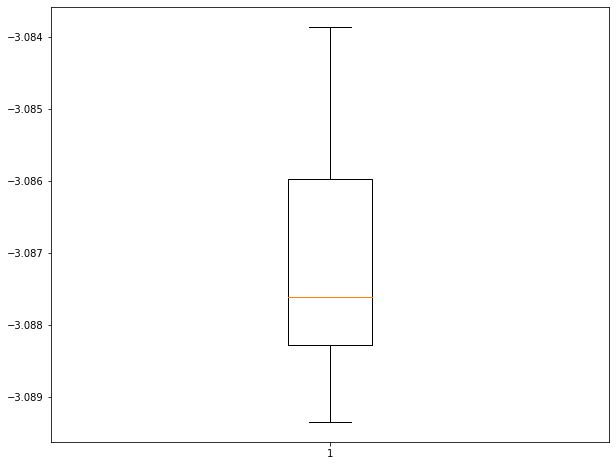

In [ ]:
# Visualize results
la=np.array(negl)
plt.boxplot(la)
 
# show plot
plt.show()

## Section 3. Evaluation Questions  [7 points ]

1. Suppose we fit a linear model to a polynomial data. Is this model a good fit? If not, is it underfitting or overfitting? [ 2 points ]


In [ ]:
# Your answer here
'''
When we fit a linear model to a polynomial data it will be a bad fit as this will result in underfitting of the data. The linear model will not be able to capture the complexity of the polynomial functoin.
'''

'\nWhen we fit a linear model to a polynomial data it will be a bad fit as this will result in underfitting of the data. The linear model will not be able to capture the complexity of the polynomial functoin.\n'

2.  How does cross validation address the problem of overfitting? Does it only identify (or detect) overfitting? Does it also eliminate (or at least reduce) overfitting? Explain
your answers. [2.5 points ]


In [ ]:
# Your answer here
'''
Cross validation splits the data into k folds and tunes the hyperparameters so as not to result in overfitting using the k-1 folds as training and 1 fold as test data. We can use cross-validation to reduce underfitting 
also and it tunes the hyperparameter to prevent underfitting also. It does not eliminate but only reduces the effect of overfitting.
'''

'\nCross validation splits the data into k folds and tunes the hyperparameters so as not to result in overfitting using the k-1 folds as training and 1 fold as test data. We can use cross-validation to reduce underfitting \nalso and it tunes the hyperparameter to prevent underfitting also. It does not eliminate but only reduces the effect of overfitting.\n'

3. Suppose you are given a dataset { (𝑥<sub>1</sub>, 𝑦<sub>1</sub>), (𝑥<sub>2</sub>, 𝑦<sub>2</sub>), ⋯ , (𝑥<sub>m</sub>, 𝑦<sub>m</sub>) } and you are asked to perform **5-fold cross-validation** for selecting the value of 𝜆 for $𝐿_2$ regularization for a regularized linear regression. Please describe the procedure of how you would select the value 𝜆. [2.5 points ]

In [ ]:
# Your answer here
'''
1. Choose your lambda then invert it as Cs the logistic regression takes is the inverse of lambdas. Store the inverse of lambdas as floats in a list.
2. Divide the dataset into k folds 
3. For each value of present in the list of C calculate the cross validation error
4. Choose lambda that produces the lowest cross validated error.
'''

'\n1. Choose your lambda then invert it as Cs the logistic regression takes is the inverse of lambdas. Store the inverse of lambdas as floats in a list.\n2. Divide the dataset into k folds \n3. For each value of present in the list of C calculate the cross validation error\n4. Choose lambda that produces the lowest cross validated error.\n'